<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Primer Parcial</h1></center>
    
<h3> Teoría de circuitos 2 </h3>
<h3> 10 de julio de 2023 </h3>
<h3> Facundo N. Iglesias </h3>

    
</div>

In [26]:
from IPython.display import IFrame, display, Math
from numpy import sqrt
import numpy as np
import matplotlib.pyplot as plt
from pytc2.general import Chebyshev_polynomials 
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
import scipy.signal as sig
import sympy as sp
from sympy.abc import s
from sympy.parsing.sympy_parser import parse_expr
from sympy.solvers import solve

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Ejercicio 1</h1></center>
    
</div>
<img src="./rsc/consigna1.png"  /> 


<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Punto a</h1></center>
    
</div>

### Plantilla de diseño del filtro:
<img src="./rsc/plantillaHP.png"  /> 
A partir de la plantilla se determina que es un filtro de tipo pasa-altos.


### Plantilla del filtro pasa-bajos prototipo
<img src="./rsc/plantillaLP.png"  /> 


## Cálculo de epsilon y del orden del filtro para máxima planicidad:

#### Cálculo de epsilon

\begin{equation}
\alpha_{dB} = 10log(1+\epsilon²\omega^{2n})
\end{equation}

\begin{equation}
\alpha_{máx} = 10log(1+\epsilon²\omega^{2n})
\end{equation}

\begin{equation}
\epsilon = \sqrt{10^{\frac{\alpha_{máx}}{10}}-1}
\end{equation}


In [7]:
alfa_max = 0.5
eps  = sqrt(10**(alfa_max/10)-1)
eps

0.34931140018894796

#### Cálculo del orden "n" del filtro

\begin{equation}
\alpha_{dB}|_{n} = 10log(1+(0,35)².3^{2n})
\end{equation}

In [12]:
n = 3
alfa_min = 10*np.log10(1+((eps)**2)*3**(2*n))
alfa_min

19.54008183864117

Para un orden 3 la atenuación supera el alfa minimo de diseño de 16 dB

#### Normalización por omega de Butterworth

\begin{equation}
\omega_B = \omega_p \epsilon^{\frac{+1}{n}} 
\end{equation}

In [14]:
w_B = 1*eps**(1/n)
w_B

0.7042674013446432

## Función transferencia del filtro pasa-bajos prototipo y pasa-altos de diseño

In [17]:
IFrame("./rsc/res1.pdf", width=1000, height=1000)

La transferencia del filtro pasa-altos normalizado resulta:
\begin{equation}
\boxed{T(s) = \frac{s}{s+1} \frac{s²}{s²+s+1}}
\end{equation}

Donde se puede observar que ambos bloques del filtro tienen una frecuencia de corte de:
\begin{equation}
\omega_0 = 1
\end{equation}
Y un factor de selectividad del bloque de segundo orden es:
\begin{equation}
Q = 1
\end{equation}




### Simulación

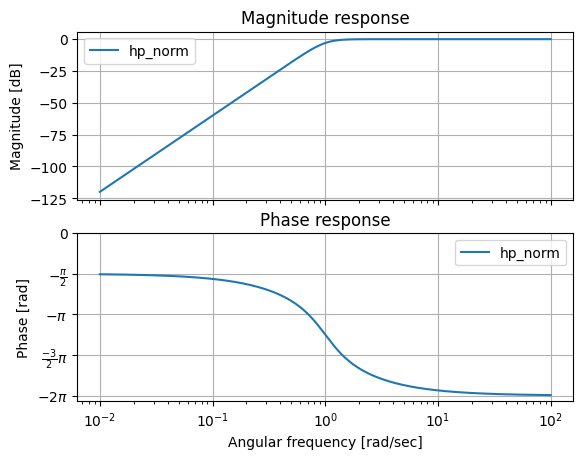

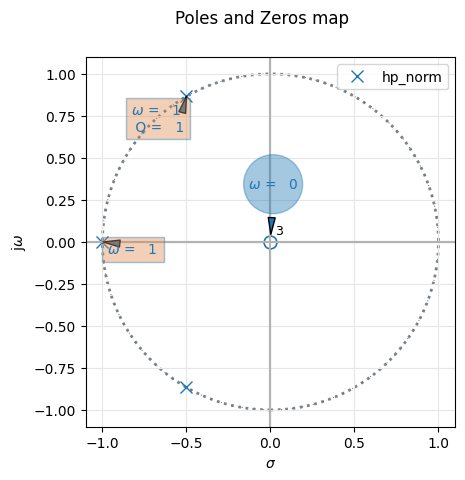

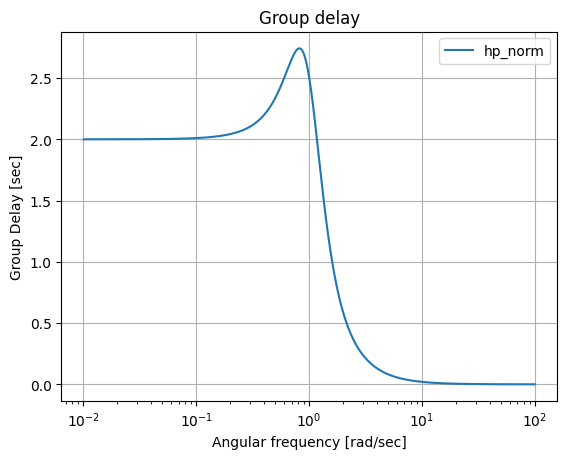

In [16]:
num_hp, den_hp = sig.lp2hp(num_lp, den_lp)
analyze_sys([sig.TransferFunction(num_hp, den_hp)], ['hp_norm'])

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Punto B</h1></center>
    
</div>

## Implementación mediante red pasiva

Primero desnormalizamos en frecuencia por la omega de Butterworth
\begin{equation}
C =  \frac{\bar{C}}{\Omega_w} = \frac{1}{0.704} = 1,42 F
\end{equation} 

\begin{equation}
L =  \frac{\bar{L}}{\Omega_w} = \frac{1}{0.704} = 1,42 H
\end{equation} 



<img src="./rsc/sim/sim1.png"  /> 
Donde podemos observar que cumple con la atenuación minima de 19,45 dB en la frecuencia de 1/3 rad/s
<img src="./rsc/sim/sim2.png"  /> 
Y también cumple con la atenuacion maxima de 0,5 dB en la banda de paso.

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Punto C</h1></center>
    
</div>

## Activación del inductor en derivación mediante GIC de Antoniou configurado como Girador

<img src="./rsc/sim/sim3.png"  /> 
<img src="./rsc/sim/sim4.png"  /> 
Se observa que nuevamente el filtro cumple con lo solicitado

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Ejercicio 2</h1></center>
    
</div>
<img src="./rsc/consigna2.png"  /> 


<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Punto A</h1></center>
    
</div>

A partir de la caracteristica de fase (rotación de 2 pi) y que la transferencia debe ser de 2do orden, se determina que la transferencia es de un filtro pasa-todo 

### Transferencia Pasa-todo
\begin{equation}
T(s) = K \frac{s²-s\frac{\omega0}{Q}+\omega_0²}{s²+s\frac{\omega0}{Q}+\omega_0²}
\end{equation}

Como la transición de fase en -pi se da a frecuencia unitaria el filtro está normalizado en frecuencia wo=1 y
para que los polos sean de máxima planicidad se adopta para el coeficiente lineal raiz de 2.
\begin{equation}
T(s) =  \frac{s²-s\sqrt{2}+1}{s²+s\sqrt{2}+1}
\end{equation}

Como K es igual a 1 la ganancia es de 0dB en la banda de paso y el factor de calidad del filtro es de:
\begin{equation}
Q = \frac{1}{\sqrt{2}} = 0,707
\end{equation}

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Punto B</h1></center>
    
</div>


In [61]:
IFrame("./rsc/lattice.pdf", width=1000, height=1000)

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Punto D</h1></center>
    
</div>

## Implementación de la bicuadratica con circuito basado en GIC

<img src="./rsc/circuito_propuesto.png"  /> 



In [30]:
V1, V2, Vx, Vy = sp.symbols("V1, V2, Vx, Vy")
Y1, Y2, Y3, Y4, Y5, YC1, YC2, C1, C2, R1, R2, R3, R4, R5, Y, C, R = sp.symbols("Y1, Y2, Y3, Y4, Y5, YC1, YC2, C1, C2, R1, R2, R3, R4, R5, Y, C, R ")

sistema = sp.solve([
                   Vx*(YC1+Y2+Y1)-V1*YC1-Vy*Y1,
                   Vx*(YC2+Y3)-Vy*YC2-V2*Y3,
                   Vx*(Y4+Y5)-V2*Y4-V1*Y5
            ], 
            [V1,V2,Vx,Vy])

transf_func = sistema[V2]/sistema[V1]
transf_func = sp.simplify(transf_func) 

tf = transf_func.subs(Y1,1/R1)
tf = tf.subs(Y2,1/R2)
tf = tf.subs(Y3,1/R3)
tf = tf.subs(Y4,1/R4)
tf = tf.subs(Y5,1/R5)
tf = tf.subs(YC1,s*C1)
tf = tf.subs(YC2,s*C2)
tf = sp.simplify(tf)
tf

(C1*C2*R1*R2*R3*R5*s**2 - C2*R1*R3*R4*s + R2*R4)/(C1*C2*R1*R2*R3*R5*s**2 + C2*R1*R3*R5*s + R2*R4)

Para que cumpla con la transferencia de un pasa-todo 
\begin{equation}
R_4 = R_5
\end{equation}

In [31]:
tf = tf.subs(R4,R)
tf = tf.subs(R5,R)
tf

(C1*C2*R*R1*R2*R3*s**2 - C2*R*R1*R3*s + R*R2)/(C1*C2*R*R1*R2*R3*s**2 + C2*R*R1*R3*s + R*R2)

In [34]:
(C2*R*R1*R3)/(C1*C2*R*R1*R2*R3)

1/(C1*R2)

\begin{equation}
\boxed{T(s) = \frac{ s² - s \frac{1}{C_1R_2} + \frac{1}{C_1C_2R_1R_3} }{  s² + s \frac{1}{C_1R_2} + \frac{1}{C_1C_2R_1R_3} }}
\end{equation}

Adoptando:
\begin{equation}
C_1 = 1F \rightarrow R_2 = 1\sqrt{2} \Omega
\end{equation}

\begin{equation}
R_4 = R_5 = 1\Omega
\end{equation}

\begin{equation}
C_2 = 1F \rightarrow R_1 = 1
\end{equation}



A continuación se observa que el circuito cumple con la caracteristica de fase
<img src="./rsc/sim/sim5.png"  /> 


<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Punto E</h1></center>
    
</div>

## Sensibilidades

In [47]:
w0_Q = (C2*R*R1*R3)/(C1*C2*R*R1*R2*R3)
w0_Q 

1/(C1*R2)

In [50]:
w0_2 = 1/(C1*C2*R1*R3)
w0_2

1/(C1*C2*R1*R3)

In [60]:
IFrame("./rsc/sens.pdf", width=1000, height=1000)

Otra sensibilidad que resultaría interesante calcular sería la correspondiente a w0 con respecto a C1, ya que dicho componente afecta tanto a la frecuencia de corte como al factor de selectividad.

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Punto F</h1></center>
    
</div>

## Desnormalización

In [54]:
IFrame("./rsc/desnorm.pdf", width=1000, height=1000)

Se verifica que ahora el cruce por -pi se da en 10 kHz, es decir que ahora los polos se ubican alrededor de una circunferencia con dicho radio
<img src="./rsc/sim/sim6.png"  /> 


<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Punto C</h1></center>
    
</div>


In [62]:
IFrame("./rsc/parametrosy.pdf", width=1000, height=1000)